In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#image training
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory(directory='C:/Users/dell/OneDrive/Desktop/seg_train',target_size=(50,50),shuffle=True)
test_dataset = test.flow_from_directory(directory='C:/Users/dell/OneDrive/Desktop/seg_test',target_size=(50,50),shuffle=True)

Found 14033 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
indices = [np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(20,8))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()

[10, 11, 10, 29, 27, 20, 30, 28, 18, 5]


C:\Users\dell\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [6]:
values = list(train_dataset.class_indices.values())
keys = list(train_dataset.class_indices.keys())

dics = list(map(lambda x,y:{x:y},values,keys))

from functools import reduce
mappings = reduce(lambda x,y:{**x,**y},dics)
mappings

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [7]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
kernel_regularizer = keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [9]:
model.compile(loss='CategoricalCrossentropy',optimizer = 'adam',metrics='accuracy')
history = model.fit(train_dataset,batch_size=80,epochs=10,validation_data=test_dataset)

Epoch 1/10
439/439 [==============================] - 214s 472ms/step - loss: 1.1662 - accuracy: 0.5392 - val_loss: 1.1305 - val_accuracy: 0.5853
Epoch 2/10
439/439 [==============================] - 136s 309ms/step - loss: 0.9265 - accuracy: 0.6433 - val_loss: 0.9253 - val_accuracy: 0.6850
Epoch 3/10
439/439 [==============================] - 199s 454ms/step - loss: 0.7693 - accuracy: 0.7186 - val_loss: 0.7506 - val_accuracy: 0.7523
Epoch 4/10
439/439 [==============================] - 226s 515ms/step - loss: 0.6871 - accuracy: 0.7646 - val_loss: 0.7112 - val_accuracy: 0.7787
Epoch 5/10
439/439 [==============================] - 132s 299ms/step - loss: 0.6034 - accuracy: 0.7894 - val_loss: 0.6207 - val_accuracy: 0.8053
Epoch 6/10
439/439 [==============================] - 128s 291ms/step - loss: 0.5467 - accuracy: 0.8135 - val_loss: 0.6588 - val_accuracy: 0.7753
Epoch 7/10
439/439 [==============================] - 129s 294ms/step - loss: 0.5096 - accuracy: 0.8277 - val_loss: 0.5631 -

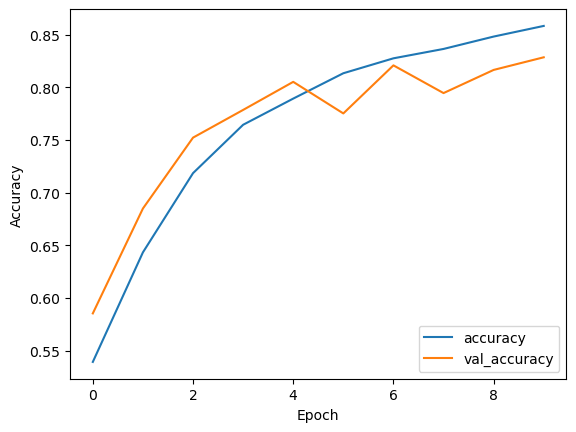

In [10]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')